In [1]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2 

# read in the json files
portfolio = pd.read_json('C:/Users/shahk/OneDrive/Desktop/New folder/subway/subway/data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('C:/Users/shahk/OneDrive/Desktop/New folder/subway/subway/data/profile.json', orient='records', lines=True)
transcript = pd.read_json('C:/Users/shahk/OneDrive/Desktop/New folder/subway/subway/data/transcript.json', orient='records', lines=True)

# 4. Data Understanding & Cleaning

## 4.1. Portfolio

In [2]:
portfolio

channels  difficulty  duration  \
0       [email, mobile, social]          10         7   
1  [web, email, mobile, social]          10         5   
2          [web, email, mobile]           0         4   
3          [web, email, mobile]           5         7   
4                  [web, email]          20        10   
5  [web, email, mobile, social]           7         7   
6  [web, email, mobile, social]          10        10   
7       [email, mobile, social]           0         3   
8  [web, email, mobile, social]           5         5   
9          [web, email, mobile]          10         7   

                                 id     offer_type  reward  
0  ae264e3637204a6fb9bb56bc8210ddfd           bogo      10  
1  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo      10  
2  3f207df678b143eea3cee63160fa8bed  informational       0  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo       5  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount       5  
5  2298d6c36e964ae4a3e7e9706d1fb8c2       discount       3  
6  fafdcd668e3743c1bb461111dcafc2a4       discount       2  
7  5a8bc65990b245e5a138643cd4eb9837  informational       0  
8  f19421c1d4aa40978ebb69ca19b0e20d           bogo       5  
9  2906b810c7d4411798c6938adc9daaa5       discount       2

In [3]:
#function for cleaning portfolio

def add_portfolio_name(portfolio_df):
    #provide portfolio name instead of id for interpretation later on

    portfolio_df['name'] = portfolio_df.offer_type.astype(str) + "_" + portfolio_df.difficulty.astype(str) +\
                      "_" + portfolio_df.reward.astype(str) + \
                     "_" + portfolio_df.duration.astype(str)
    return portfolio_df

def one_hot_channels(portfolio_df):
    #one hot encoded channels columns
    channels = ['web', 'email', 'mobile', 'social']

    for channel in channels:
        portfolio_df[channel] = portfolio_df.channels.apply(lambda x: channel in x)*1

    #drop channels column
    portfolio_df = portfolio_df.drop('channels', axis=1)
    
    return portfolio_df

def portfolio_preprocessing(portfolio_df):
    # portfolio preporcessing function, execute : add_portfolio_name and one_hot_channels
    
    portfolio_df = add_portfolio_name(portfolio_df)
    # one_hot_channels
    portfolio_df = one_hot_channels(portfolio_df)
    return portfolio_df

In [4]:
portfolio_clean = portfolio_preprocessing(portfolio)

In [5]:
portfolio_clean

difficulty  duration                                id     offer_type  \
0          10         7  ae264e3637204a6fb9bb56bc8210ddfd           bogo   
1          10         5  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo   
2           0         4  3f207df678b143eea3cee63160fa8bed  informational   
3           5         7  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo   
4          20        10  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount   
5           7         7  2298d6c36e964ae4a3e7e9706d1fb8c2       discount   
6          10        10  fafdcd668e3743c1bb461111dcafc2a4       discount   
7           0         3  5a8bc65990b245e5a138643cd4eb9837  informational   
8           5         5  f19421c1d4aa40978ebb69ca19b0e20d           bogo   
9          10         7  2906b810c7d4411798c6938adc9daaa5       discount   

   reward                 name  web  email  mobile  social  
0      10         bogo_10_10_7    0      1       1       1  
1      10         bogo_10_10_5    1      1       1       1  
2       0  informational_0_0_4    1      1       1       0  
3       5           bogo_5_5_7    1      1       1       0  
4       5     discount_20_5_10    1      1       0       0  
5       3       discount_7_3_7    1      1       1       1  
6       2     discount_10_2_10    1      1       1       1  
7       0  informational_0_0_3    0      1       1       1  
8       5           bogo_5_5_5    1      1       1       1  
9       2      discount_10_2_7    1      1       1       0

In [6]:
# offer type distribution
portfolio_clean.offer_type.value_counts()#.plot(kind='bar')

discount         4
bogo             4
informational    2
Name: offer_type, dtype: int64

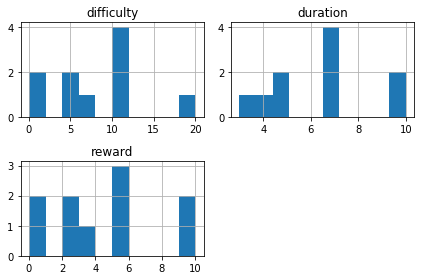

In [7]:
# distribution of portfolio difficulty, reward, and duration
portfolio_clean[['difficulty', 'reward', 'duration']].hist();
plt.tight_layout()

In [8]:
channels = ['web', 'email', 'mobile', 'social']
portfolio_clean.groupby('offer_type').sum()[channels].sum()

web        8
email     10
mobile     9
social     6
dtype: int64

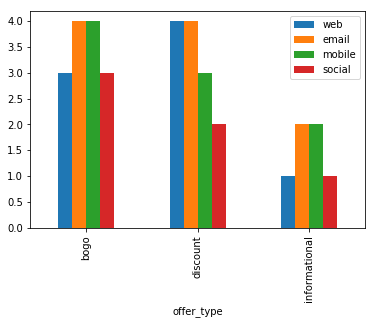

In [9]:
# offer type distribution by channels
channels = ['web', 'email', 'mobile', 'social']
portfolio_clean.groupby('offer_type').sum()[channels].plot(kind='bar')

## 4.2. Profile

In [10]:
profile.head()

age  became_member_on gender                                id    income
0  118          20170212   None  68be06ca386d4c31939f3a4f0e3dd783       NaN
1   55          20170715      F  0610b486422d4921ae7d2bf64640c50b  112000.0
2  118          20180712   None  38fe809add3b4fcf9315a9694bb96ff5       NaN
3   75          20170509      F  78afa995795e4d85b5d9ceeca43f5fef  100000.0
4  118          20170804   None  a03223e636434f42ac4c3df47e8bac43       NaN

In [11]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


`became_member_on` data type is in int64, we want to parse it to dates.

In [12]:
print(f'There are {profile.shape[0]} profiles in profile dataframe')

There are 17000 profiles in profile dataframe


In [13]:
profile[['age', 'income']].describe()

age         income
count  17000.000000   14825.000000
mean      62.531412   65404.991568
std       26.738580   21598.299410
min       18.000000   30000.000000
25%       45.000000   49000.000000
50%       58.000000   64000.000000
75%       73.000000   80000.000000
max      118.000000  120000.000000

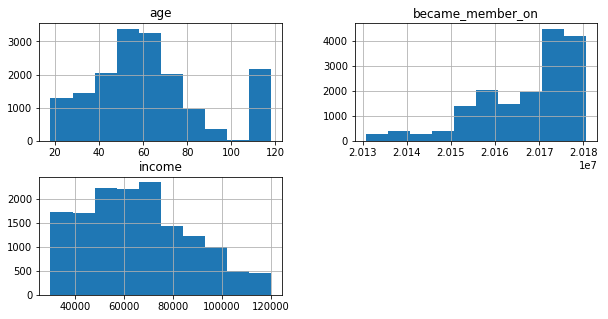

In [14]:
# distribution of age and income column
profile[['age', 'income', 'became_member_on']].hist(figsize=(10,5));


In [15]:
profile[profile.age > 100].head()

age  became_member_on gender                                id  income
0  118          20170212   None  68be06ca386d4c31939f3a4f0e3dd783     NaN
2  118          20180712   None  38fe809add3b4fcf9315a9694bb96ff5     NaN
4  118          20170804   None  a03223e636434f42ac4c3df47e8bac43     NaN
6  118          20170925   None  8ec6ce2a7e7949b1bf142def7d0e0586     NaN
7  118          20171002   None  68617ca6246f4fbc85e91a2a49552598     NaN

In [16]:
profile[profile.age == 118]['age'].value_counts()

118    2175
Name: age, dtype: int64

In [17]:
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

#### Age & Income Statistics 
- The mean age is 62.53 with standard deviation 26.74
- The mean income is 65405 dollars with standard deviation 21598 dollars
- There were 2175 profiles (12.7%) with age more than 100 years, specifically at 118 age where all missing values in income and gender columns are associated with this profile . This is a **possibility for abnormalities** in the profile data. We will investigate later on whether to remove or keep them.

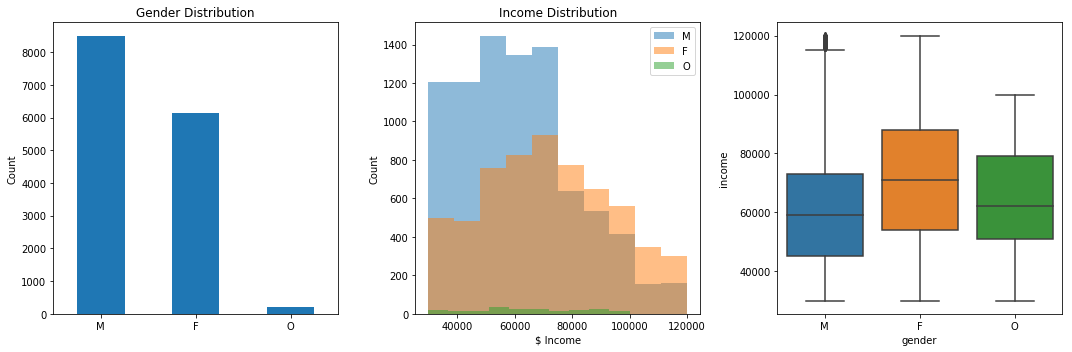

In [18]:
""" GENDER """

f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5))

#plot gender distribution histogram
profile.gender.value_counts().plot(kind='bar', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_title('Gender Distribution')
ax1.set_ylabel('Count')

# plot income distribution histogram
ax2.hist(profile[profile.gender == 'M']['income'], alpha=0.5, label='M')
ax2.hist(profile[profile.gender == 'F']['income'], alpha=0.5, label='F')
ax2.hist(profile[profile.gender == 'O']['income'], alpha=0.5, label='O')
ax2.set_xlabel('$ Income')
ax2.set_ylabel('Count')
ax2.set_title('Income Distribution')
ax2.legend()

# boxplot income distribution
sns.boxplot('gender', 'income', data=profile, ax=ax3, order=['M', 'F', 'O'])

plt.tight_layout()


In [19]:
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [20]:
#statistics income by gender
profile.groupby('gender').describe()['income']

count          mean           std      min      25%      50%  \
gender                                                                  
F       6129.0  71306.412139  22338.353773  30000.0  54000.0  71000.0   
M       8484.0  61194.601603  20069.517615  30000.0  45000.0  59000.0   
O        212.0  63287.735849  18938.594726  30000.0  51000.0  62000.0   

            75%       max  
gender                     
F       88000.0  120000.0  
M       73000.0  120000.0  
O       79250.0  100000.0

#### Gender Statistics
- Most of customers are males (50%) then followed by females (36%), other gender (1.25%), and unknown gender (12.8%). 
- the average income of females (71306 dollars) are higher than males (61194 dollars) and other gender (63287 dollars).
- There are small amount of 'O' / other genders and their income distribution is quite uniform with average income is higher than males.

### 4.2.1 Parsing Dates

In [21]:
#parse dates in became_member_on column

def profile_parse_dates(profile_df):
    profile_df = profile_df.copy()

    #convert to string
    profile_df['became_member_on'] = profile_df.became_member_on.apply(lambda x: str(x))
    #convert to datetime format
    profile_df['became_member_on'] = pd.to_datetime(profile_df.became_member_on)
    return profile_df

profile_clean = profile_parse_dates(profile)

In [22]:
profile_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null datetime64[ns]
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 664.1+ KB


Text(0.5, 1.0, 'Distribution of became_member_on')

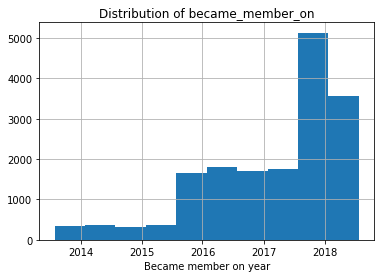

In [23]:
profile_clean.became_member_on.hist()
plt.xlabel('Became member on year')
plt.title('Distribution of became_member_on')

### 4.2.2 Missing Values 

In [24]:
# how much data is missing in each column of profile dataset 
profile_clean.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [25]:
# How much data is missing in each row of profiile  dataset?
row_null = profile_clean.isnull().sum(axis=1)
row_null.value_counts()

0    14825
2     2175
dtype: int64

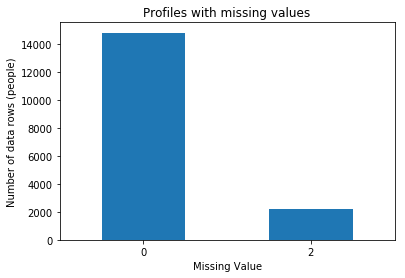

In [26]:
# How much data is missing in each row of profiile  dataset?
row_null = profile_clean.isnull().sum(axis=1)
row_null.value_counts().plot(kind='bar')
plt.xlabel('Missing Value')
plt.xticks(rotation=0)
plt.ylabel('Number of data rows (people)')
plt.title('Profiles with missing values')
plt.show()

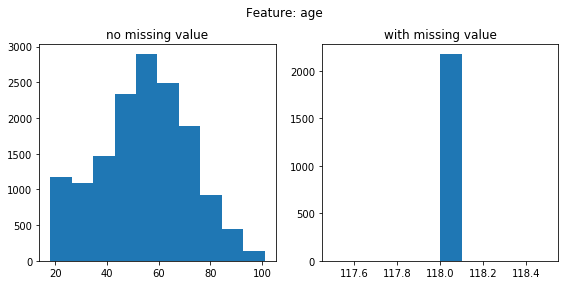

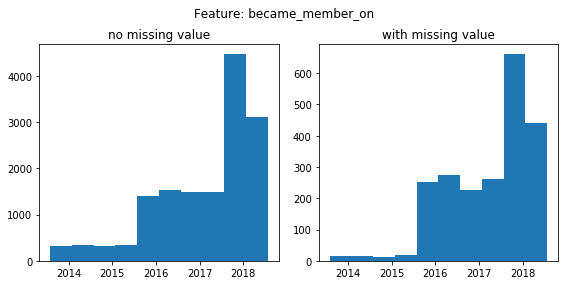

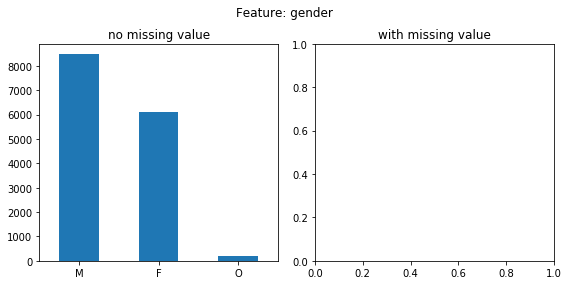

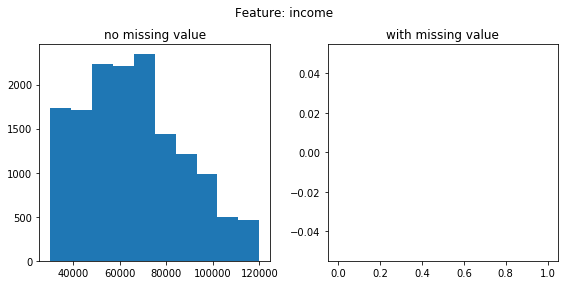

In [27]:
""" Comparing data with no missing value and lot of missing values """

profile_ = profile_clean[row_null ==0]
profile_null = profile_clean[row_null > 0]

for col in ['age', 'became_member_on','gender', 'income' ]:
    row_null = profile_clean.isnull().sum(axis=1)
    f, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))
   
    if col == 'gender':
        profile_[col].value_counts().plot(kind='bar', ax=ax1)
        ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(),rotation=0)
        try :
            profile_null[col].value_counts().plot(kind='bar', ax=ax2)
            
        except:
            pass
    else:
        profile_[col].hist(ax=ax1)
        profile_null[col].hist(ax=ax2)
    
    ax1.grid(False)
    ax2.grid(False)
    ax1.set_title('no missing value' )
    ax2.set_title('with missing value')
    f.suptitle('Feature: ' + col)
    f.tight_layout()
    f.subplots_adjust(top=0.85)

#### Profile Data Summary :
1. There were 17000 profiles, 2175 profiles have missing values in gender and income.
2. `became_member_on` data type int64, so It requires to be converted to datetimes data type
3. There were abnormalities in the profile data where the age is 118 years are associated with all missing values in income and gender columns. There about 2175 profiles. Probably they don't want to share the informations or in this a default age number in the app. We will investigate their spending pattern later on to decide whether to remove or keep them.
4. Most of customers are males (50%) then followed by females (36%), other gender (1.25%), and unknown gender (12.8%). However the average income of females (71306 dollars) are higher than males (61194 dollars) and other gender (63287 dollars).

## 4.3. Transcript

In [28]:
print(f'There were {transcript.shape[0]} data in transcript dataset')
transcript.head()

There were 306534 data in transcript dataset


event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                              value  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}

In [29]:
transcript.tail()

event                            person  time  \
306529  transaction  b3a1272bc9904337b331bf348c3e8c17   714   
306530  transaction  68213b08d99a4ae1b0dcb72aebd9aa35   714   
306531  transaction  a00058cf10334a308c68e7631c529907   714   
306532  transaction  76ddbd6576844afe811f1a3c0fbb5bec   714   
306533  transaction  c02b10e8752c4d8e9b73f918558531f7   714   

                                 value  
306529  {'amount': 1.5899999999999999}  
306530                {'amount': 9.53}  
306531                {'amount': 3.61}  
306532  {'amount': 3.5300000000000002}  
306533                {'amount': 4.05}

In [30]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [31]:
transcript.describe()

time
count  306534.000000
mean      366.382940
std       200.326314
min         0.000000
25%       186.000000
50%       408.000000
75%       528.000000
max       714.000000

In [32]:
#check for missing value
transcript.isnull().sum()

event     0
person    0
time      0
value     0
dtype: int64

In [33]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [34]:
# unique profile in transcript match with unique profile in profile data
transcript.person.unique().shape

(17000,)

#### Transcript Data :
- There were 306534 data in transcript dataset
- Most data related to event `transaction`, followed by `offer recevied`, `offer viewed`, and `offer completed`.
- All profiles in profile data is available in transcript data.
- No missing values

### 4.3.1. Transcript Preprocessing

The `value` column consisted of dictionary containing `offer_id` and `amount`. The `offer_id` is related to the `event` of offer received, reviewed, and completed. The `amount` is related to event of transaction.

Therefore, this column will be encoded and added 2 new columns to contains `offer_id` and transaction `amount`. The profile and portfolio dataframe will be join to the transcript dataframe.

In [35]:
""" Encode offer_id and amount in value column """

def encode_offer_id(x):
    try :
        return x['offer id']
    except:
        return x['offer_id']

def transcript_encoded(transcript_df):
    transcript_encoded = transcript_df.copy()
    transcript_encoded['offer_id'] = transcript[transcript.event.isin(['offer received', 'offer viewed', 'offer completed'])]\
                                                             .value.apply(encode_offer_id)
    transcript_encoded['amount'] =  transcript[transcript.event.isin(['transaction'])].value.apply(lambda x: x['amount'])
    return transcript_encoded

transcript_encoded(transcript).head()

event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                              value  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}   
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}   
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}   
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}   
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}   

                           offer_id  amount  
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN  
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN  
2  2906b810c7d4411798c6938adc9daaa5     NaN  
3  fafdcd668e3743c1bb461111dcafc2a4     NaN  
4  4d5c57ea9a6940dd891ad53e9dbe8da0     NaN

In [36]:
""" join profile, portfolio dataset to transcript dataframe """

def merge_transcript_profile(transcript_df, profile_df):
    profile_df = profile_parse_dates(profile_df)
    transcript_encoded_df = transcript_encoded(transcript_df)
    transcript_profile_df = pd.merge(transcript_encoded_df, profile_df, left_on=['person'], 
                                      right_on = ['id'], how ='left')
    transcript_profile_df = transcript_profile_df.drop(['id'], axis=1)
    
    return transcript_profile_df


def merge_transcript_profile_portfolio(transcript_df, profile_df, portfolio_df):
    portfolio_df = portfolio_preprocessing(portfolio_df)
    transcript_profile_df = merge_transcript_profile(transcript_df, profile_df)
    transcript_profile_porto = pd.merge(transcript_profile_df, portfolio_df, left_on = 'offer_id', right_on ='id', how='left').drop('id', axis=1)
    return transcript_profile_porto


transcript_merged = merge_transcript_profile_portfolio(transcript, profile, portfolio)
transcript_merged.head()

event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                              value  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}   
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}   
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}   
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}   
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}   

                           offer_id  amount  age became_member_on gender  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN   75       2017-05-09      F   
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN  118       2017-08-04   None   
2  2906b810c7d4411798c6938adc9daaa5     NaN   68       2018-04-26      M   
3  fafdcd668e3743c1bb461111dcafc2a4     NaN  118       2017-09-25   None   
4  4d5c57ea9a6940dd891ad53e9dbe8da0     NaN  118       2017-10-02   None   

     income  difficulty  duration offer_type  reward              name  web  \
0  100000.0         5.0       7.0       bogo     5.0        bogo_5_5_7  1.0   
1       NaN        20.0      10.0   discount     5.0  discount_20_5_10  1.0   
2   70000.0        10.0       7.0   discount     2.0   discount_10_2_7  1.0   
3       NaN        10.0      10.0   discount     2.0  discount_10_2_10  1.0   
4       NaN        10.0       5.0       bogo    10.0      bogo_10_10_5  1.0   

   email  mobile  social  
0    1.0     1.0     0.0  
1    1.0     0.0     0.0  
2    1.0     1.0     0.0  
3    1.0     1.0     1.0  
4    1.0     1.0     1.0

### 4.3.2. Event & Offer Type distribution 

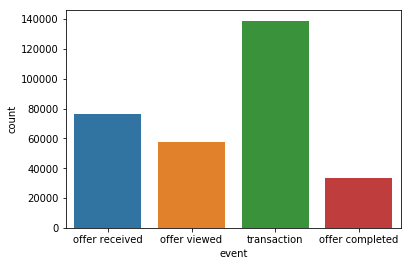

In [37]:
""" the distribution of transcript event type """

sns.countplot('event', data= transcript_merged)

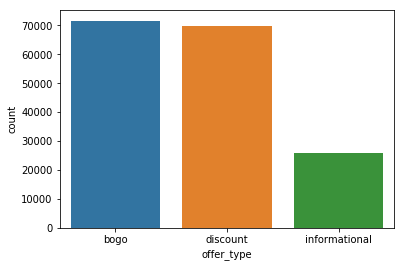

In [38]:
""" offer type distribution """
sns.countplot('offer_type', data= transcript_merged)

Text(0.5, 1.0, 'The distribution of offer name sent to customers')

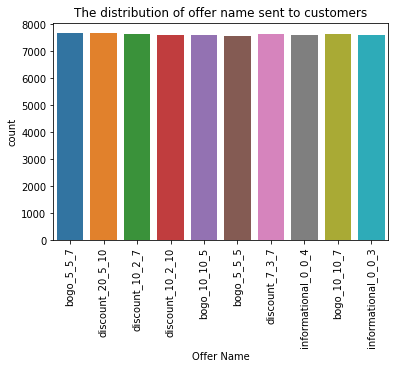

In [39]:
""" The distribuiton of offer sent to customers """

received = transcript_merged[transcript_merged.event =='offer received']

sns.countplot(received['name'])
plt.xlabel('Offer Name')
plt.xticks(rotation=90)
plt.title('The distribution of offer name sent to customers')

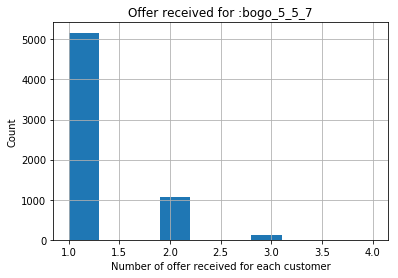

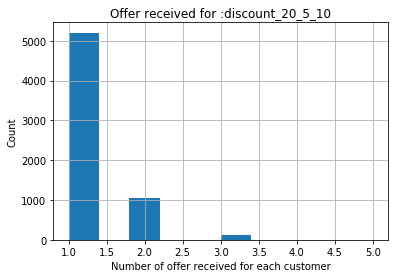

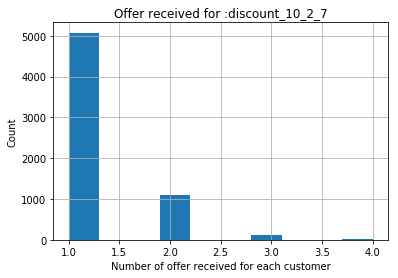

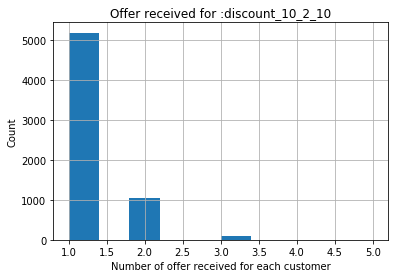

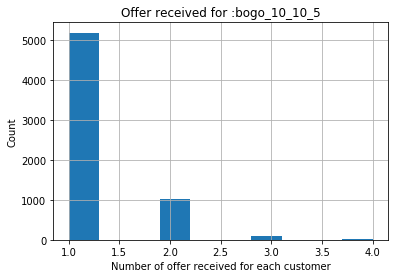

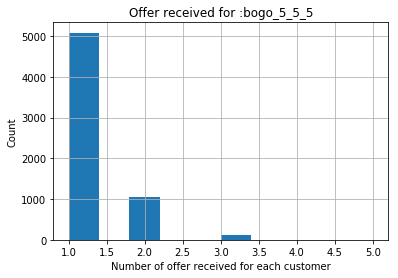

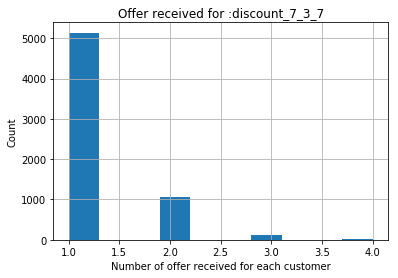

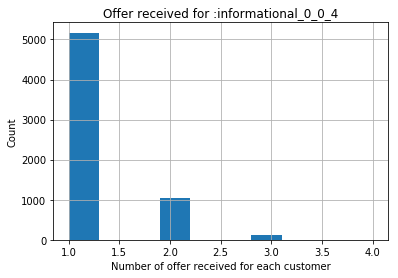

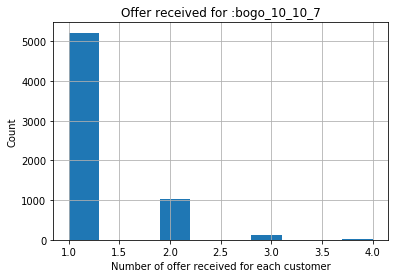

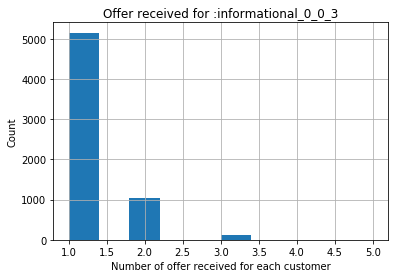

In [40]:
""" The distribution of offer received for each customer (profile) """

for offer_name in received.name.unique():
    received[received.name == offer_name]['person'].value_counts().hist()
    plt.xlabel('Number of offer received for each customer')
    plt.ylabel('Count')
    plt.title('Offer received for :' + offer_name)
    plt.show()

The distribution of offer received by each customer is similar to all offering type. Some customer received more than 1 time for the same offer.

### 4.3.3 Spending and Transaction Count

count    16578.000000
mean        13.680266
std         16.056763
min          0.050000
25%          3.181392
50%         11.996607
75%         20.469643
max        451.470000
Name: amount, dtype: float64

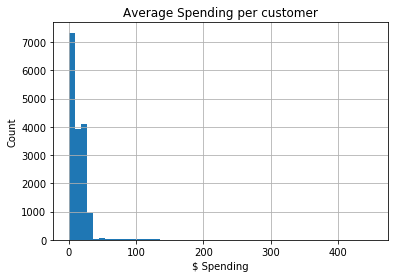

In [41]:
""" Average Spending distribution for each customer """

transcript_merged.groupby('person')['amount'].mean().hist(bins=50)
plt.xlabel('$ Spending')
plt.ylabel('Count')
plt.title('Average Spending per customer')
transcript_merged.groupby('person')['amount'].mean().describe()

count    17000.000000
mean       104.438351
std        125.922619
min          0.000000
25%         21.820000
50%         69.405000
75%        148.782500
max       1608.690000
Name: amount, dtype: float64

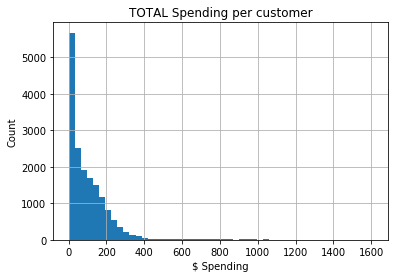

In [42]:
""" Total Spending distribution for each customer """

transcript_merged.groupby('person')['amount'].sum().hist(bins=50)
plt.xlabel('$ Spending')
plt.ylabel('Count')
plt.title('TOTAL Spending per customer')
transcript_merged.groupby('person')['amount'].sum().describe()

Text(0.5, 0, 'gender')

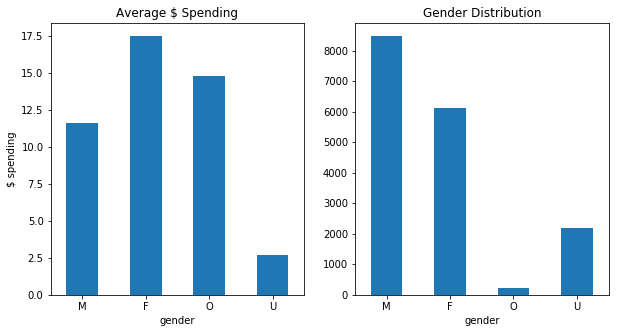

In [44]:
""" Average spending by GENDER """

# assign missing value in gender with 'U' value
transcript_merged_ = transcript_merged.copy()
transcript_merged_.loc[transcript_merged.gender.isnull(), 'gender'] ='U'

#plot
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

#plot average spending
transcript_merged_.groupby('gender')['amount'].mean()[['M', 'F', 'O', 'U']].plot(kind='bar', ax=ax1);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_ylabel("$ spending")
ax1.set_title("Average $ Spending");

#plot gender distribution
profile.fillna('U').gender.value_counts()[['M', 'F', 'O', 'U']].plot(kind='bar', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
plt.title('Gender Distribution');
ax2.set_xlabel('gender')

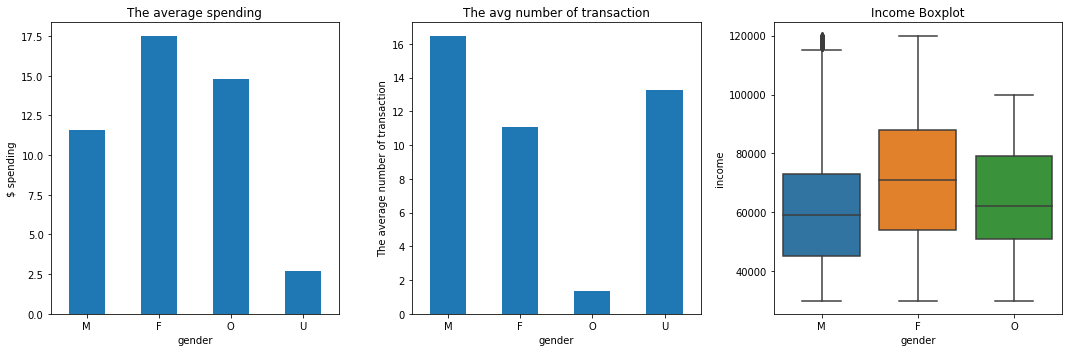

In [45]:
""" The number of transaction by GENDER """

#plot avg spending
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
transcript_merged_.groupby('gender')['amount'].mean()[['M', 'F', 'O', 'U']].plot(kind='bar', ax=ax1);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_ylabel("$ spending")
ax1.set_title('The average spending')

# plot avg number of transaction

transcript_merged_.groupby(['gender', 'amount'])['amount'].count().mean(level=0)[['M', 'F', 'O', 'U']].plot(kind='bar', ax=ax2);
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=0);
ax2.set_ylabel("The average number of transaction");
ax2.set_title("The avg number of transaction");

# boxplot income distribution
sns.boxplot('gender', 'income', data=profile, ax=ax3, order=['M', 'F', 'O'])
ax3.set_title('Income Boxplot')

plt.tight_layout()


The highest average spending is made by females while customer with gender 'O' /other gender is the second highest despite there are only few of them and also only made few transactions. 

The average spending is correlated with income. The higher the income, the higher the average spending is.

The unknown / 'U' gender is the lowest average spending, however they made higher number of transactions than females and others. It may indicate they are a different customer types / demographis and should be assessed separately rather than remove them from dataset. 

### 4.3.4 Offer Received, Viewed and Completed

Text(0.5, 1.0, 'Portfolio Distribution by Event')

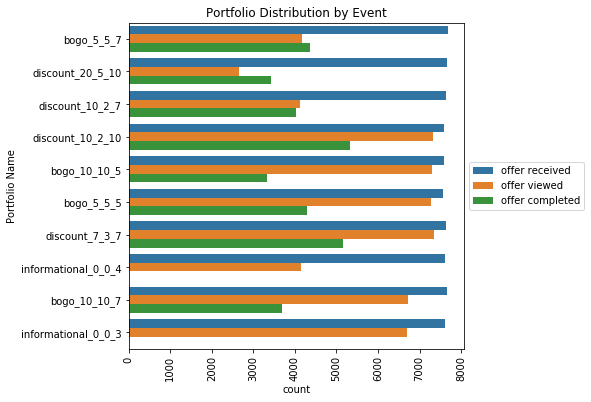

In [46]:
"""
Portfolio Distribution by event
"""

plt.figure(figsize=(6,6))
sns.countplot(y='name', hue='event', data=transcript_merged[~transcript_merged.event.isin(['transaction'])]);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.ylabel("Portfolio Name")
plt.title("Portfolio Distribution by Event")

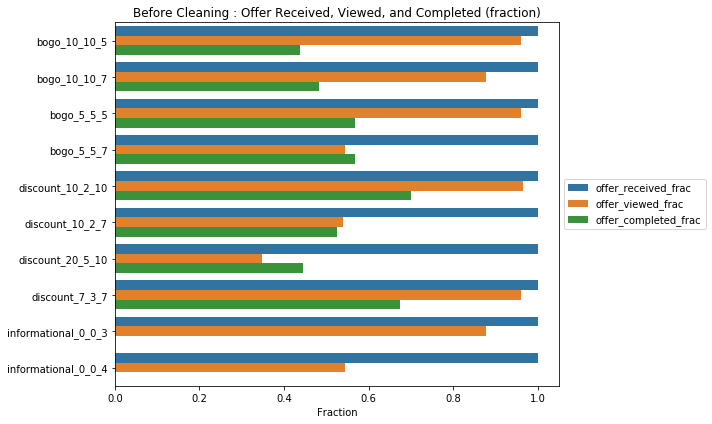

In [47]:
""" Portfolio Distribution by event in Fraction """

event_count = transcript_merged[~transcript_merged.event.isin(['transaction'])].groupby(['name', 'event']).size().unstack()
event_count['offer_received_frac'] = event_count['offer received']/ event_count['offer received']
event_count['offer_viewed_frac'] = event_count['offer viewed']/ event_count['offer received']
event_count['offer_completed_frac'] =  event_count['offer completed']/ event_count['offer received']

event_count_frac = event_count[['offer_received_frac','offer_viewed_frac', 'offer_completed_frac']]

event_count_stack = event_count_frac.stack().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x=0,y='name', hue='event', data=event_count_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(top=0.8)
plt.title("Before Cleaning : Offer Received, Viewed, and Completed (fraction)")
plt.ylabel('')
plt.xlabel('Fraction')

plt.tight_layout()

### Abnormalities in transcript data :
From the figure above, `Bogo 5_5_7` and `Discount_20_5_10` appeared to have higher offer completed than offer viewed. It means that the transaction was not due to the offer and requires  to be cleaned out or separate  for further analysis. 

In [48]:
%load_ext autoreload
%autoreload 2
import helpers as h

# re-read read in the json files
portfolio = pd.read_json('C:/Users/shahk/OneDrive/Desktop/New folder/subway/subway/data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('C:/Users/shahk/OneDrive/Desktop/New folder/subway/subway/data/profile.json', orient='records', lines=True)
transcript = pd.read_json('C:/Users/shahk/OneDrive/Desktop/New folder/subway/subway/data/transcript.json', orient='records', lines=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
transcript_clean, transcript_all = h.transcript_preprocessing(transcript, profile, portfolio)

The transcript_clean.csv and transcript_merge.csv file are available at local folder


In [50]:
transcript_clean.head()

event                            person  time  \
Unnamed: 0                                                           
0           offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1           offer received  a03223e636434f42ac4c3df47e8bac43     0   
2           offer received  e2127556f4f64592b11af22de27a7932     0   
3           offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4           offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                                       value  \
Unnamed: 0                                                     
0           {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}   
1           {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}   
2           {'offer id': '2906b810c7d4411798c6938adc9daaa5'}   
3           {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}   
4           {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}   

                                    offer_id  amount  age became_member_on  \
Unnamed: 0                                                                   
0           9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN   75       2017-05-09   
1           0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN  118       2017-08-04   
2           2906b810c7d4411798c6938adc9daaa5     NaN   68       2018-04-26   
3           fafdcd668e3743c1bb461111dcafc2a4     NaN  118       2017-09-25   
4           4d5c57ea9a6940dd891ad53e9dbe8da0     NaN  118       2017-10-02   

           gender    income  difficulty  duration offer_type  reward  \
Unnamed: 0                                                             
0               F  100000.0         5.0       7.0       bogo     5.0   
1             NaN       NaN        20.0      10.0   discount     5.0   
2               M   70000.0        10.0       7.0   discount     2.0   
3             NaN       NaN        10.0      10.0   discount     2.0   
4             NaN       NaN        10.0       5.0       bogo    10.0   

                        name  web  email  mobile  social  invalid  
Unnamed: 0                                                         
0                 bogo_5_5_7  1.0    1.0     1.0     0.0      0.0  
1           discount_20_5_10  1.0    1.0     0.0     0.0      0.0  
2            discount_10_2_7  1.0    1.0     1.0     0.0      0.0  
3           discount_10_2_10  1.0    1.0     1.0     1.0      0.0  
4               bogo_10_10_5  1.0    1.0     1.0     1.0      0.0

In [51]:
transcript_all.head()

event                            person  time  \
Unnamed: 0                                                           
0           offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1           offer received  a03223e636434f42ac4c3df47e8bac43     0   
2           offer received  e2127556f4f64592b11af22de27a7932     0   
3           offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4           offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                                       value  \
Unnamed: 0                                                     
0           {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}   
1           {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}   
2           {'offer id': '2906b810c7d4411798c6938adc9daaa5'}   
3           {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}   
4           {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}   

                                    offer_id  amount  age became_member_on  \
Unnamed: 0                                                                   
0           9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN   75       2017-05-09   
1           0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN  118       2017-08-04   
2           2906b810c7d4411798c6938adc9daaa5     NaN   68       2018-04-26   
3           fafdcd668e3743c1bb461111dcafc2a4     NaN  118       2017-09-25   
4           4d5c57ea9a6940dd891ad53e9dbe8da0     NaN  118       2017-10-02   

           gender    income  difficulty  duration offer_type  reward  \
Unnamed: 0                                                             
0               F  100000.0         5.0       7.0       bogo     5.0   
1             NaN       NaN        20.0      10.0   discount     5.0   
2               M   70000.0        10.0       7.0   discount     2.0   
3             NaN       NaN        10.0      10.0   discount     2.0   
4             NaN       NaN        10.0       5.0       bogo    10.0   

                        name  web  email  mobile  social  invalid  
Unnamed: 0                                                         
0                 bogo_5_5_7  1.0    1.0     1.0     0.0      0.0  
1           discount_20_5_10  1.0    1.0     0.0     0.0      0.0  
2            discount_10_2_7  1.0    1.0     1.0     0.0      0.0  
3           discount_10_2_10  1.0    1.0     1.0     1.0      0.0  
4               bogo_10_10_5  1.0    1.0     1.0     1.0      0.0

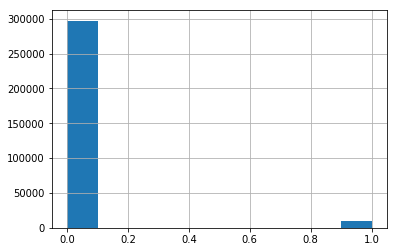

In [52]:
transcript_all.invalid.hist()

### 4.3.6 Visualize Offer Received, Viewed, and Completed

In [53]:
event_count = transcript_clean.groupby(['name', 'offer_type','event']).size().unstack()
event_count['offer_received_frac'] = event_count['offer received']/ event_count['offer received']
event_count['offer_viewed_frac'] = event_count['offer viewed']/ event_count['offer received']
event_count['offer_completed_frac'] =  event_count['offer completed']/ event_count['offer received']

event_count_frac = event_count[['offer_received_frac','offer_viewed_frac', 'offer_completed_frac']]
event_count_frac.reset_index()

event                 name     offer_type  offer_received_frac  \
0             bogo_10_10_5           bogo                  1.0   
1             bogo_10_10_7           bogo                  1.0   
2               bogo_5_5_5           bogo                  1.0   
3               bogo_5_5_7           bogo                  1.0   
4         discount_10_2_10       discount                  1.0   
5          discount_10_2_7       discount                  1.0   
6         discount_20_5_10       discount                  1.0   
7           discount_7_3_7       discount                  1.0   
8      informational_0_0_3  informational                  1.0   
9      informational_0_0_4  informational                  1.0   

event  offer_viewed_frac  offer_completed_frac  
0               0.961148              0.369946  
1               0.876991              0.352964  
2               0.959451              0.471536  
3               0.543311              0.287091  
4               0.964460              0.623404  
5               0.539570              0.288391  
6               0.347287              0.184924  
7               0.959587              0.583442  
8               0.877789                   NaN  
9               0.544046                   NaN

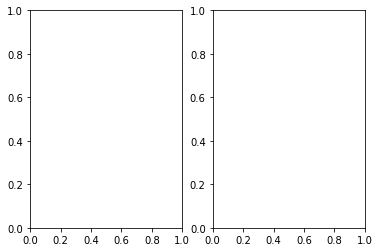

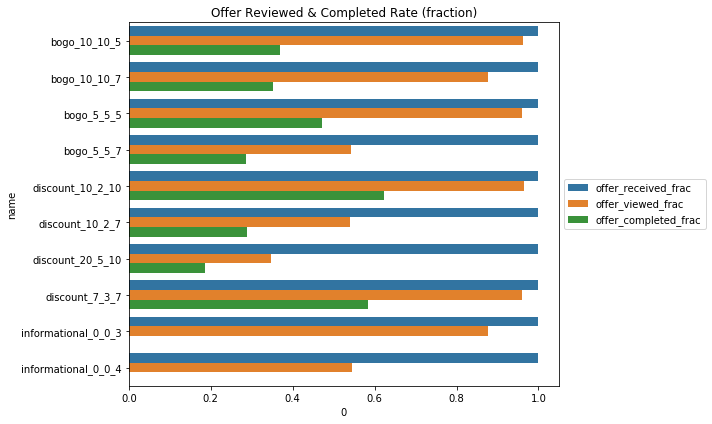

In [54]:
event_count_stack = event_count_frac.stack().reset_index()

f, (ax1, ax2) = plt.subplots(1,2)
plt.figure(figsize=(10,6))
sns.barplot(x=0,y='name', hue='event', data=event_count_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(top=0.8)
plt.title("Offer Reviewed & Completed Rate (fraction)")

plt.tight_layout()

Notice that there is no offer with the `offer_completed` fraction is larger than `offer_viewed` as in before cleaning.

## Which offer type has the higher viewed and completed rate ?

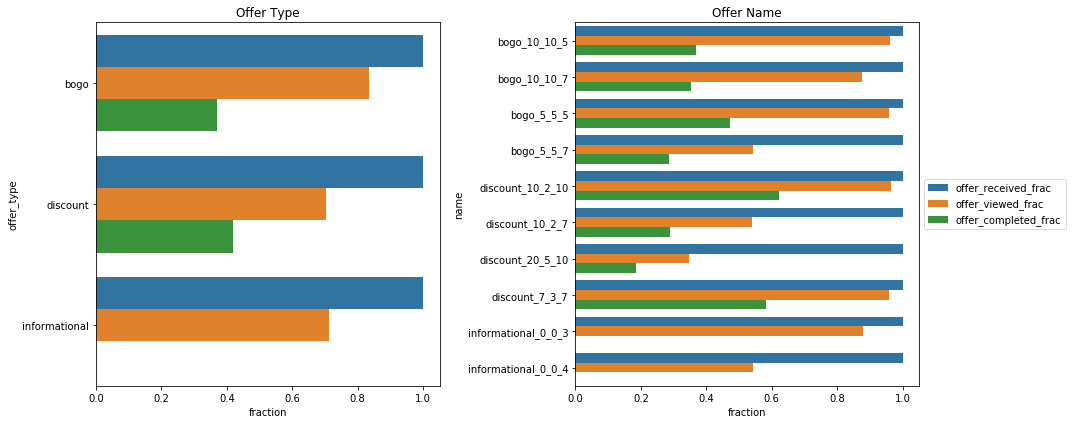

In [55]:
event_count_stack = event_count_frac.stack().reset_index()

f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

# plot offer type

sns.barplot(x=0,y='offer_type', hue='event', data=event_count_stack, ci=None, ax=ax1)
ax1.legend().set_visible(False)
ax1.set_title("Offer Type")
ax1.set_xlabel('fraction')

# plot offer name
sns.barplot(x=0,y='name', hue='event', data=event_count_stack, ax=ax2)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_title("Offer Name")
ax2.set_xlabel('fraction')


#plt.subplots_adjust(top=0.8)
plt.tight_layout()

**Which offer type has the higher viewed and completed rate ?**
- The highest reviewed rate is discount_7_3_7, followed by discout_10_2_10
- The highest completed rate is discount_10_2_10, followed by discount_7_3_7
- Most offer viewed rate is bogos, while most offer completed is discount


## 4.4. Feature Extraction from clean transcript, profile, and portfolio

Function of `feature_extraction` is created in `helpers.py` to extract features from `transcript`, `profile` and `portfolio` clean dataframe and return a clean `profile_udpated` dataframe 

In [56]:

%load_ext autoreload
%autoreload 2

import helpers as h

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

#clean transcript
transcript_clean, transcript_all = h.transcript_preprocessing(transcript, profile, portfolio)

#extract features
profile_updated = h.feature_extraction(transcript_clean,transcript_all,profile, portfolio)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The transcript_clean.csv and transcript_merge.csv file are available at local folder
The profile_updated.csv file is available at local folder.


In [57]:
profile_updated.shape

(17000, 92)

In [58]:
profile_updated.head()

age became_member_on gender    income  \
Unnamed: 0                                                                
68be06ca386d4c31939f3a4f0e3dd783  118       2017-02-12    NaN       NaN   
0610b486422d4921ae7d2bf64640c50b   55       2017-07-15      F  112000.0   
38fe809add3b4fcf9315a9694bb96ff5  118       2018-07-12    NaN       NaN   
78afa995795e4d85b5d9ceeca43f5fef   75       2017-05-09      F  100000.0   
a03223e636434f42ac4c3df47e8bac43  118       2017-08-04    NaN       NaN   

                                  offer received_bogo_10_10_7  \
Unnamed: 0                                                      
68be06ca386d4c31939f3a4f0e3dd783                          0.0   
0610b486422d4921ae7d2bf64640c50b                          0.0   
38fe809add3b4fcf9315a9694bb96ff5                          0.0   
78afa995795e4d85b5d9ceeca43f5fef                          1.0   
a03223e636434f42ac4c3df47e8bac43                          0.0   

                                  offer received_bogo_10_10_5  \
Unnamed: 0                                                      
68be06ca386d4c31939f3a4f0e3dd783                          0.0   
0610b486422d4921ae7d2bf64640c50b                          0.0   
38fe809add3b4fcf9315a9694bb96ff5                          0.0   
78afa995795e4d85b5d9ceeca43f5fef                          0.0   
a03223e636434f42ac4c3df47e8bac43                          0.0   

                                  offer received_informational_0_0_4  \
Unnamed: 0                                                             
68be06ca386d4c31939f3a4f0e3dd783                                 0.0   
0610b486422d4921ae7d2bf64640c50b                                 1.0   
38fe809add3b4fcf9315a9694bb96ff5                                 0.0   
78afa995795e4d85b5d9ceeca43f5fef                                 0.0   
a03223e636434f42ac4c3df47e8bac43                                 1.0   

                                  offer received_bogo_5_5_7  \
Unnamed: 0                                                    
68be06ca386d4c31939f3a4f0e3dd783                        0.0   
0610b486422d4921ae7d2bf64640c50b                        1.0   
38fe809add3b4fcf9315a9694bb96ff5                        1.0   
78afa995795e4d85b5d9ceeca43f5fef                        1.0   
a03223e636434f42ac4c3df47e8bac43                        0.0   

                                  offer received_discount_20_5_10  \
Unnamed: 0                                                          
68be06ca386d4c31939f3a4f0e3dd783                              1.0   
0610b486422d4921ae7d2bf64640c50b                              0.0   
38fe809add3b4fcf9315a9694bb96ff5                              0.0   
78afa995795e4d85b5d9ceeca43f5fef                              0.0   
a03223e636434f42ac4c3df47e8bac43                              3.0   

                                  offer received_discount_7_3_7  ...  \
Unnamed: 0                                                       ...   
68be06ca386d4c31939f3a4f0e3dd783                            1.0  ...   
0610b486422d4921ae7d2bf64640c50b                            0.0  ...   
38fe809add3b4fcf9315a9694bb96ff5                            0.0  ...   
78afa995795e4d85b5d9ceeca43f5fef                            0.0  ...   
a03223e636434f42ac4c3df47e8bac43                            0.0  ...   

                                  rate_offer_completed_viewed_discount_10_2_10  \
Unnamed: 0                                                                       
68be06ca386d4c31939f3a4f0e3dd783                                           0.5   
0610b486422d4921ae7d2bf64640c50b                                           0.0   
38fe809add3b4fcf9315a9694bb96ff5                                           0.0   
78afa995795e4d85b5d9ceeca43f5fef                                           0.0   
a03223e636434f42ac4c3df47e8bac43                                           0.0   

                                  rate_offer_completed_received_discount_10_2_10  \
U

In [59]:
profile_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17000 entries, 68be06ca386d4c31939f3a4f0e3dd783 to e4052622e5ba45a8b96b59aba68cf068
Data columns (total 92 columns):
age                                               17000 non-null int64
became_member_on                                  17000 non-null datetime64[ns]
gender                                            14825 non-null object
income                                            14825 non-null float64
offer received_bogo_10_10_7                       17000 non-null float64
offer received_bogo_10_10_5                       17000 non-null float64
offer received_informational_0_0_4                17000 non-null float64
offer received_bogo_5_5_7                         17000 non-null float64
offer received_discount_20_5_10                   17000 non-null float64
offer received_discount_7_3_7                     17000 non-null float64
offer received_discount_10_2_10                   17000 non-null float64
offer received_informational_0_